# Lab 1 

In [21]:
import scipy.stats

## A little statistics

### &nbsp;&nbsp;&nbsp;1. Converting a probability into a 'sigma'.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Reading (no code needed)

In my reading of what a normal distribution is, there were several main points covered. Frist of all, it is also known as a Gaussian Distribution. It is a distribution centered on a mean. The width of the curve is based on a variable known as sigma. 68% of all data points in a Gaussian Distribution will be within plus or minus 1 sigma of the mean, while 95% will be within 2, and 99.7% within 3. The more sigma from the mean that one goes, the closer to 100% that one approaches, however, since the Gaussian only approaches zero at the infinites, the only way to get 100% of all possible outcomes is to go infinite sigma away. The integral of any normal distribution will always equal 1, regardless of mean that it is centered on or standard deviation (sigma squared).

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. Integrating the standard normal distribution

For this section, I decided to o several integrals. the first was $\int\limits_{-\infty}^{0}PDF(x) dx$, which is just the left half of the Gaussian. As expected, this resulted in 0.5

In [22]:
# Integral from -infinity to 0 PDF (Z = 0)
scipy.stats.norm.cdf(0)

0.5

From here, I tried $\int\limits_{-\infty}^{3}PDF(x) dx$. This resulted in ~0.9987 which is to be expected. Since $\int\limits_{-3\sigma}^{3\sigma}PDF(x) dx = 0.997$, we know that the tails contain ~0.003 of the area. Since we only included the left tail, we would expect to see roughly $0.997+\frac{0.003}{2}$ or about 0.9985

In [23]:
# Integral from -infinity to 3 PDF (Z = 3)
scipy.stats.norm.cdf(3)

0.9986501019683699

I then tried both 0 and 3 for the survival function which worked as predicted. I got the same results as for the cumulative distribution function, which is to be expected.

In [24]:
# Integral from 0 to infinity PDF (Z = 0)
scipy.stats.norm.sf(0)

0.5

In [25]:
# Integral from 3 to infinity of PDF (Z = -3)
scipy.stats.norm.sf(3)

0.0013498980316300933

Next I tried combining the two to do $\int\limits_{-3}^{3}PDF(x) dx$

In [26]:
# Integral from -3 to 3 of PDF
1 - scipy.stats.norm.cdf(-3) - scipy.stats.norm.sf(3)

0.9973002039367398

Finally, I tried the inverse, which is to find the probability of ending up 3 sigma away in either direction from the mean

In [27]:
# Integral from -infitity to -3 plus integral from 3 to infinity of PDF
scipy.stats.norm.cdf(-3) + scipy.stats.norm.sf(3)

0.0026997960632601866

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;C. Determine the associated 'sigma' value

This section, I find the associate 'sigma' value given a probability. I started by testing with known values. 0.5 was the first choice since it is 0 sigma away.

In [28]:
# Sigma of a probability of 0.5
scipy.stats.norm.ppf(0.5)

0.0

The next was $0.84134$, since this was the value of 1 sigma in the Z-table. This makes sense since from the mean to 1 sigma to the right of the mean has about 0.34 of the probabilty ($\frac{0.68}{2} = 0.34$, and thus $0.34+0.5=0.84$.

In [29]:
# Sigma of a probability of 0.84134 (1 Sigma on Z-Table)
scipy.stats.norm.ppf(0.84134)

0.9999803859660787

After this, I tried 0.97725, which is 2 sigma from the mean.

In [30]:
# Sigma of a probability of 0.97725 (2 Sigma on Z-Table)
scipy.stats.norm.ppf(0.97725)

2.0000024438996027

Finally, I tried $0.9999997133484281$ and $2.866515718791933 * 10^{-7}$, to see what 5 and -5 looked like respectively. These were specifically chosen since in physics 5 sigma is a statistically significant signal

In [31]:
# Sigma of a probability of ~0.9999997 (5 Sigma on Z-Table)
scipy.stats.norm.ppf(0.9999997133484281)

4.999999999970176

In [32]:
# Sigma of a probability of ~0.2.8665e-07 (-5 Sigma on Z-Table)
scipy.stats.norm.ppf(2.866515718791933e-07)

-5.000000000000001

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Explaination of negative Sigma

The negative sigma value indicates the endpoint for the integral to get the given area is to the left of the mean. For example, the endpoints of an integral that covers the an area of roughly $2.867^{-7}$ of the PDF would go from -infinity to to -5 Sigma

### &nbsp;&nbsp;&nbsp; 2. Continuous analytic distributions

In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In this section, I start by making a graph of a Gamma distribution using the scipy gamma module. In addition, I used the same library to generate 100k samples from the same distribution,then plotted them as a histogram on the same graph.

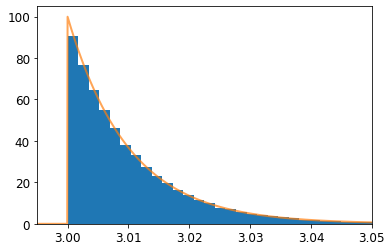

In [34]:
# Realization with ~100k samples
d = scipy.stats.gamma.rvs(1, loc = 3.0, scale = .01, size = 100000)

# Analytic PDF
fig, ax = plt.subplots(1, 1)
ax.hist(d,75, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([2.995,3.05])
x = np.linspace(2.995,3.05,1000)
ax.plot(x,scipy.stats.gamma.pdf(a = 1, x = x,loc = 3, scale = 0.01),linewidth = 2,alpha = 0.7)
plt.show()

### &nbsp;&nbsp;&nbsp;3. Determine the 'sigma'

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; A. Hypothetical Value

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; I chose a hypothetical value of 3.042, since it visually appears to be decently significant of a signal

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; B. The statistical question

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; What is the probability of reciving a signal of 3.042 or higher?

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; C. Mathematical integral

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\int\limits_{3.042}^\infty {\dfrac{x^{a-1}e^{-x}}{\Gamma \left( x \right)}dx}$ In this integral, the bounds are $3.042$ and $\infty$ since we want to know the probability of a signal from 3.042 or greater.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; D. Calculate the probability

The probability here uses a survival function because we want the right side tail. It stops at $3.042$ since that is where our signal is, and we want to know the probability of seeing $3.042$ or higher. This code is the same as $\int\limits_{3.042}^\infty {\dfrac{x^{a-1}e^{-x}}{\Gamma \left( x \right)}dx}$

In [35]:
# Porbability to see a signal of 3.042 or higher 
q = scipy.stats.gamma.sf(x = 3.042, a = 1, loc = 3, scale = 0.01)
q

0.014995576820477986

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; E. Equivalent 'sigma'

From there, we got that the probability is roughly $0.015$. We plug this probability into the inverse survival function (ISF) for a normal distrubution to find our sigma value. The ISF essentially solve for $a$ in the equation $\int\limits_{a}^\infty \frac{1}{{\sigma \sqrt {2\pi } }}e^{-\frac{(x - \mu )^2}{2\sigma ^2 }} = 0.015$, where $\mu=0$ and $\sigma=1$

In [36]:
# Equivelant sigma on a normal distribution
scipy.stats.norm.isf(q = q)

2.1702071900967366

### &nbsp;&nbsp;&nbsp; 4. Explore values

In this section, I decided to try a somewhat significant value of 3.07 based on visual inspection, a value that I thought could be close to 5 sigma (3.17), a value close to the vertical jump (3.0001), and a value close to 0 sigma.

In [37]:
# Porbability to see a signal of 3.07 or higher 
q = scipy.stats.gamma.sf(x = 3.05, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.006737946999085587
Sigma:		2.4709386372615825


In [38]:
# Porbability to see a signal of 3.17 or higher 
q = scipy.stats.gamma.sf(x = 3.17, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	4.1399377187851926e-08
Sigma:		5.360920932782273


In [39]:
# Porbability to see a signal of 3.0001 or higher 
q = scipy.stats.gamma.sf(x = 3.0001, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.9900498337491471
Sigma:		-2.328221737536387


In [40]:
# Porbability to see a signal of 3.007 or higher 
q = scipy.stats.gamma.sf(x = 3.007, a = 1, loc = 3, scale = 0.01)
print("Probability:\t" + str(q))
print("Sigma:\t\t" + str(scipy.stats.norm.isf(q = q)))

Probability:	0.49658530379140375
Sigma:		0.00855947858249478


## Non-continuous distributions

### &nbsp;&nbsp;&nbsp; A. Binomial Distribution

The binomial distribution is a distribution of successes based on *n* experiments, with each experiment having the same probability, *p*, of success or failure. The expected value of such a distribution is *n*\**p*. The binomial distribution is written as $\binom{n}{k} p^{k} (1-p)^{(n-k)}$, where $k$ is the probability of getting *exactly* k successes.

### &nbsp;&nbsp;&nbsp; B. Binomial Distribution Graphed

In the below code, I graphed the distribution of getting x successes, given a 50% rate, and 12 experiments. This distribution would represent flipping 12 coins and counting the number of heads.

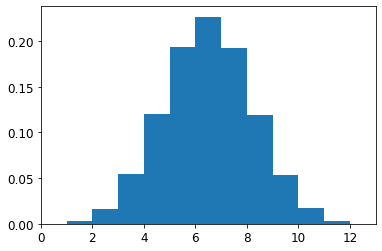

In [61]:
d = scipy.stats.binom.rvs(12,0.5, size=100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d, bins = 12, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([0,13])

plt.show()


The below plot shows a the distribution of the number of successes given a 25% chance of success with 10 experiments per trial. As expected, the distribution is shifted to the left, with a tail to the right. The mean of such a distribution is 2.5, which is represented in the graph with the 2 bin slightly taller than the 3 bin. This would be the equivalent of drawing 1 by 1 and replacing them afterwards and counting the number of times a heart is drawn.

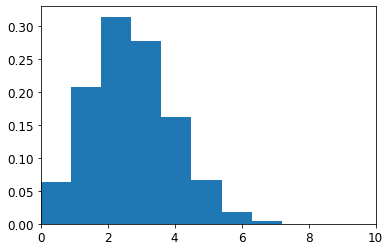

In [66]:
d = scipy.stats.binom.rvs(10, 0.25, size=100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d, bins = 10, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([0,10])

plt.show()

Finally, given a 92% chance of success, and conducting 50 experiments, we see the following graph. This would be the equivalent of drawing 50 cards 1 by 1 and replacing them afterwards and counting the number of times any card but an ace was drawn. I started the graph at 35, since below 35 cards has a very small probability, and doesn't actually graph. Given the high probability of success we see a shift to the left of the graph as expected

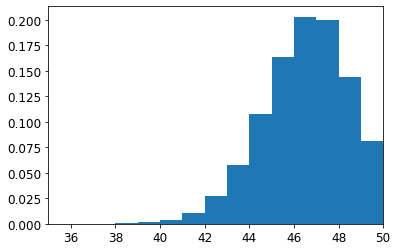

In [78]:
d = scipy.stats.binom.rvs(50, 0.92, size=100000)

fig, ax = plt.subplots(1, 1)
ax.hist(d, bins = 15, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([35,50])

plt.show()

### &nbsp;&nbsp;&nbsp; C. Hypothetical question

What is the probability of getting exactly 5 heads if I flip 12 coins?

For this question, p = 0.5, n = 12, and k = 5. Plugging this into the above eqution, we get ~0.1933

### &nbsp;&nbsp;&nbsp; D. Implications for Experiments

This means that we can't hit all sigma values, and thus we might over or under estimate sigma. For example, in a certain experiment, one might need to get a much more unlikely and signal-like signal in order to have a signal that is greater than 5 sigma if the next lowest sigma is below 4.9. This could mean that the signal that one is looking for could be considered statistically insignificant simply because the distribution is discrete and doesn't allow for it to be exaclty 5.

### &nbsp;&nbsp;&nbsp; E. Parameters

It makes sense that a mean can be continuous because the mean simply tells you where the data is centered around. It isn't the most often value we see, only where the values gravitate evenly around. It is allowed to be specific since by it's nature it doesn't need to be a value that can actually happen, but rather it tells you about the data set. Measureable values must be discrete, however calculated values do not have to be.